![Imagen](https://docs.google.com/uc?export=download&id=15xHjlq4eim3Ryn3bfm5mfyj_LDDyiu1c)

## Integrantes:
### Carlos Fernando Sierra Delgado
### Ortega María Guadalupe

In [43]:
#Libreria para cargar nuestro drive
#from google.colab import drive
#Cargamos nuestro drive en nuestro notebook
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#!ls "/content/drive/My Drive/Ciencia de datos/Proyecto de clasificación binaria"

 CD_15_ML-RegresionLineal_PrediccionCosto.ipynb   figuras
 datos						 'Poyecto de clasificación binaria.ipynb'


In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

# Análisis y exportación de los datos

In [2]:
df_train = pd.read_csv('datos/german_train_test.txt', delimiter="\s+", names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
                                                                              'A11','A12','A13','A14','A15','A16','A17','A18','A19','A20',
                                                                              'A21','A22','A23','A24','A25'])
df_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [3]:
#'Status of existing checking account','Duration in month','Credit history','Purpose','Credit amount','Savings account/bonds','Present employment since','Installment rate in percentage of disposable income','Other debtors / guarantors','Present residence since','Property','Age in years','Other installment plans','Housing','Number of existing credits at this bank','Job','Number of people being liable to provide maintenance for','Telephone','foreign worker'])
df_train.shape

(900, 25)

In [4]:
df_train.dtypes

A1     int64
A2     int64
A3     int64
A4     int64
A5     int64
A6     int64
A7     int64
A8     int64
A9     int64
A10    int64
A11    int64
A12    int64
A13    int64
A14    int64
A15    int64
A16    int64
A17    int64
A18    int64
A19    int64
A20    int64
A21    int64
A22    int64
A23    int64
A24    int64
A25    int64
dtype: object

array([[<Axes: title={'center': 'A1'}>, <Axes: title={'center': 'A2'}>,
        <Axes: title={'center': 'A3'}>, <Axes: title={'center': 'A4'}>,
        <Axes: title={'center': 'A5'}>],
       [<Axes: title={'center': 'A6'}>, <Axes: title={'center': 'A7'}>,
        <Axes: title={'center': 'A8'}>, <Axes: title={'center': 'A9'}>,
        <Axes: title={'center': 'A10'}>],
       [<Axes: title={'center': 'A11'}>, <Axes: title={'center': 'A12'}>,
        <Axes: title={'center': 'A13'}>, <Axes: title={'center': 'A14'}>,
        <Axes: title={'center': 'A15'}>],
       [<Axes: title={'center': 'A16'}>, <Axes: title={'center': 'A17'}>,
        <Axes: title={'center': 'A18'}>, <Axes: title={'center': 'A19'}>,
        <Axes: title={'center': 'A20'}>],
       [<Axes: title={'center': 'A21'}>, <Axes: title={'center': 'A22'}>,
        <Axes: title={'center': 'A23'}>, <Axes: title={'center': 'A24'}>,
        <Axes: title={'center': 'A25'}>]], dtype=object)

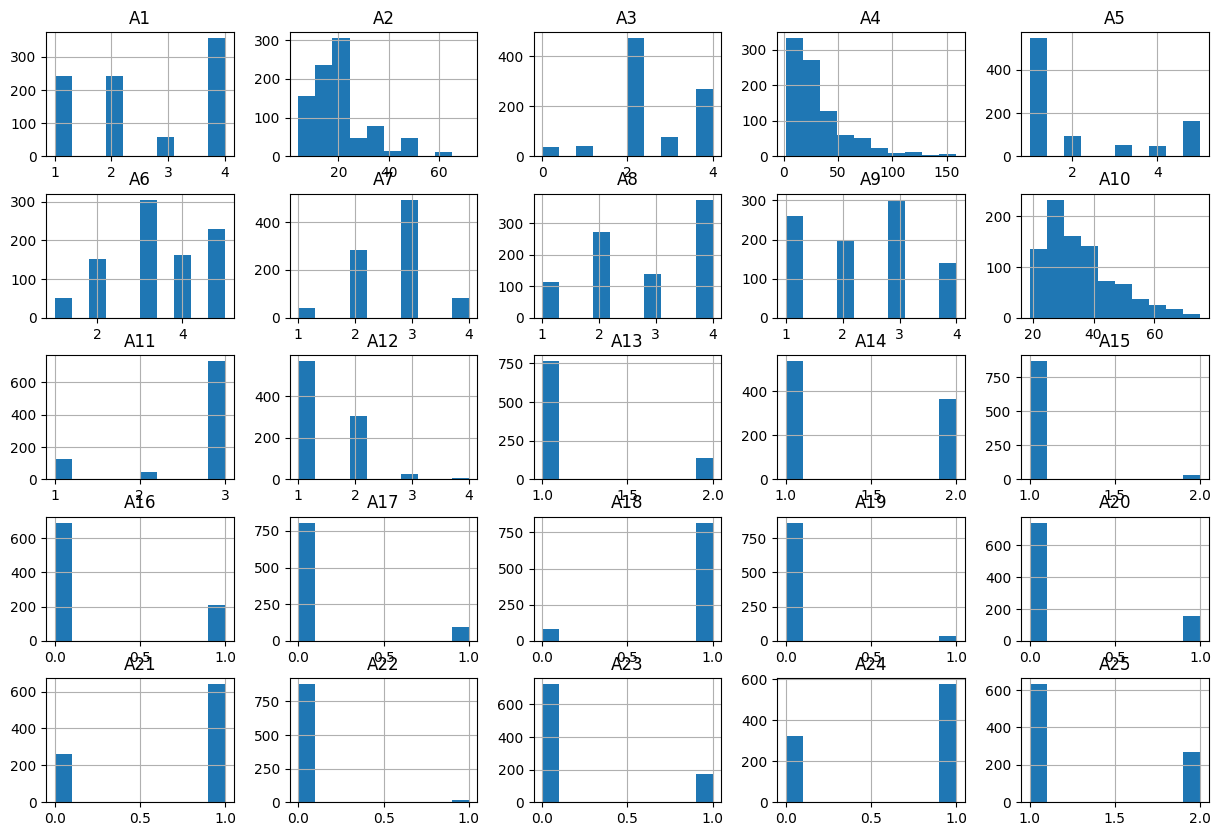

In [5]:
df_train.hist(figsize=(15,10))

array([[<Axes: xlabel='A2', ylabel='A2'>,
        <Axes: xlabel='A4', ylabel='A2'>,
        <Axes: xlabel='A10', ylabel='A2'>],
       [<Axes: xlabel='A2', ylabel='A4'>,
        <Axes: xlabel='A4', ylabel='A4'>,
        <Axes: xlabel='A10', ylabel='A4'>],
       [<Axes: xlabel='A2', ylabel='A10'>,
        <Axes: xlabel='A4', ylabel='A10'>,
        <Axes: xlabel='A10', ylabel='A10'>]], dtype=object)

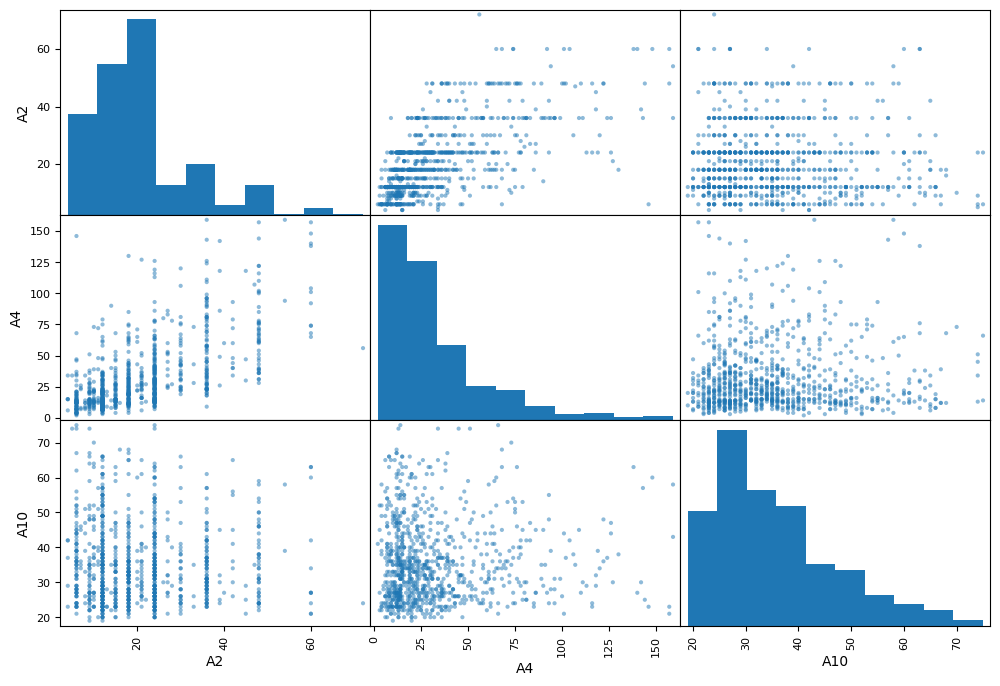

In [6]:
from pandas.plotting import scatter_matrix
# ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
#'A11','A12','A13','A14','A15','A16','A17','A18','A19','A20',
#'A21','A22','A23','A24','A25']
atributos = [  'A2' , 'A4' , 'A10']
scatter_matrix( df_train[ atributos] , figsize=(12,8) )

In [7]:
df_train[atributos].corr(method='pearson').round(2)

,A2,A4,A10
A2,1.00,0.63,-0.03
A4,0.63,1.00,0.02
A10,-0.03,0.02,1.00


<Axes: >

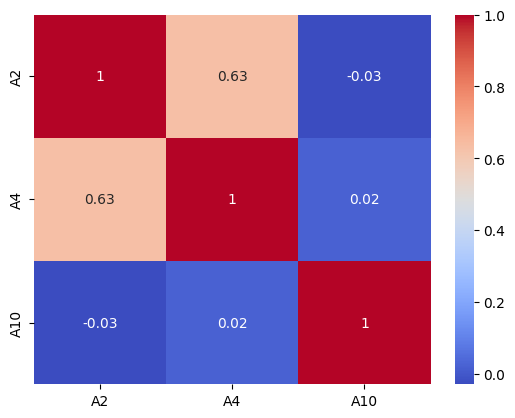

In [8]:
import seaborn as sn
corrMatrix=df_train[atributos].corr().round(2)
sn.heatmap(  corrMatrix  , annot=True , cmap='coolwarm'   )

In [9]:
X_train=df_train.drop('A25',axis=1)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
0,1,6,4,12,5,5,3,4,1,67,...,1,0,0,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,...,1,0,0,1,0,0,1,0,0,1
2,4,12,4,21,1,4,3,3,1,49,...,1,0,0,1,0,0,1,0,1,0
3,1,42,2,79,1,4,3,4,2,45,...,1,0,0,0,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,...,1,1,0,1,0,0,0,0,0,1


In [10]:
y_train = df_train['A25']
y_train.head()

0    1
1    2
2    1
3    1
4    2
Name: A25, dtype: int64

In [12]:
X_test=pd.read_csv('datos/german_validation.txt', delimiter="\s+", names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
                                                                              'A11','A12','A13','A14','A15','A16','A17','A18','A19','A20',
                                                                              'A21','A22','A23','A24','A25']).iloc[:,:-1]
X_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
0,1,16,4,26,1,5,3,4,2,43,...,1,1,0,0,0,1,0,0,0,1
1,4,20,4,35,5,2,1,4,1,44,...,1,1,0,1,0,0,1,0,0,1
2,4,36,4,105,5,5,3,4,4,42,...,1,0,1,1,0,0,0,0,0,1
3,4,15,2,14,5,3,4,2,1,40,...,1,0,0,1,0,1,0,0,0,1
4,4,24,2,13,1,5,3,1,1,36,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,12,2,17,1,4,2,4,1,31,...,1,0,0,1,0,0,1,0,1,0
96,1,30,2,39,1,3,1,4,2,40,...,1,0,1,1,0,0,1,0,0,0
97,4,12,2,8,1,5,3,4,3,38,...,1,0,0,1,0,0,1,0,0,1
98,1,45,2,18,1,3,3,4,4,23,...,1,0,0,1,0,0,0,0,0,1


In [13]:
y_test=pd.read_csv('datos/german_validation.txt', delimiter="\s+", names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
                                                                              'A11','A12','A13','A14','A15','A16','A17','A18','A19','A20',
                                                                              'A21','A22','A23','A24','A25']).iloc[:,-1]
y_test

0     2
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    2
99    1
Name: A25, Length: 100, dtype: int64

In [57]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((900, 24), (100, 24), (900,), (100,))

#Entrenamiento

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [59]:
numeric_list=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
                'A11','A12','A13','A14','A15','A16','A17','A18','A19','A20',
                'A21','A22','A23','A24','A25']

In [60]:
numeric_transformer=Pipeline(steps=[('scaler',StandardScaler())])

In [61]:
transformer=ColumnTransformer([('num',numeric_transformer,numeric_list)])

In [62]:
#Usando el RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
modelo_RF=RandomForestClassifier()

In [64]:
modelo_RF.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_predict=modelo_RF.predict(X_test)
y_predict

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1])

In [66]:
y_test.values

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [67]:
np.equal(y_predict,y_test.values)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [68]:
modelo_RF.score(X_test,y_test)

0.75

In [69]:
# RandomForestClassifier(random_state=17,n_estimators=i)
for i in range(1,8,1):
    for j in range(2,15,2):
        modelo_RF=RandomForestClassifier(random_state=42,n_estimators=i,max_depth=j)
        modelo_RF.fit(X_train,y_train)
        score_RF=modelo_RF.score(X_test, y_test)
        print('max_depth=', i ,", min_samples_leaf=", j , ", s=",score_RF)

max_depth= 1 , min_samples_leaf= 2 , s= 0.72
max_depth= 1 , min_samples_leaf= 4 , s= 0.73
max_depth= 1 , min_samples_leaf= 6 , s= 0.72
max_depth= 1 , min_samples_leaf= 8 , s= 0.71
max_depth= 1 , min_samples_leaf= 10 , s= 0.71
max_depth= 1 , min_samples_leaf= 12 , s= 0.74
max_depth= 1 , min_samples_leaf= 14 , s= 0.62
max_depth= 2 , min_samples_leaf= 2 , s= 0.69
max_depth= 2 , min_samples_leaf= 4 , s= 0.78
max_depth= 2 , min_samples_leaf= 6 , s= 0.74
max_depth= 2 , min_samples_leaf= 8 , s= 0.73
max_depth= 2 , min_samples_leaf= 10 , s= 0.74
max_depth= 2 , min_samples_leaf= 12 , s= 0.72
max_depth= 2 , min_samples_leaf= 14 , s= 0.71
max_depth= 3 , min_samples_leaf= 2 , s= 0.68
max_depth= 3 , min_samples_leaf= 4 , s= 0.77
max_depth= 3 , min_samples_leaf= 6 , s= 0.76
max_depth= 3 , min_samples_leaf= 8 , s= 0.75
max_depth= 3 , min_samples_leaf= 10 , s= 0.7
max_depth= 3 , min_samples_leaf= 12 , s= 0.73
max_depth= 3 , min_samples_leaf= 14 , s= 0.7
max_depth= 4 , min_samples_leaf= 2 , s= 0.73
max

| Modelo o clasificador   |  Eficiencia | Parametros de ajuste  |
|---|---|---|
|  Random Forest | 0.75  |        |
|  Random Forest Afinado   | 0.81  |  max_depth= 6 , min_samples_leaf= 6   |
